In [1]:
import sqlite3
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

In [2]:
database_path:str = "../db.sqlite3"
sql:str = "SELECT * FROM PerfectParking_parkingrequestlog"

In [3]:
connection = sqlite3.connect(database_path)
dataframe:DataFrame = pandas.read_sql_query(sql, connection)
connection.close()

In [4]:
dataframe.head()

,id,area_of_interest_latitude,area_of_interest_longitude,time_stamp,user_ip_address,user_id
0,1,52.0463,-9.515,2023-08-16 18:44:27.790256,127.0.0.1,NaN
1,2,52.0463,-9.515,2023-08-16 18:46:22.553170,127.0.0.1,14.0
2,3,52.0463,-9.515,2023-08-16 18:46:51.781508,127.0.0.1,14.0
3,4,52.0463,-9.515,2023-08-16 18:46:55.306892,127.0.0.1,14.0
4,5,52.0463,-9.515,2023-08-16 18:47:44.234370,127.0.0.1,14.0


In [5]:
dataframe['time_stamp'] = pandas.to_datetime(dataframe['time_stamp'])

In [6]:
#create a column with the hour of the day
dataframe['hour'] = dataframe['time_stamp'].dt.hour


In [7]:

#get dataframe info/column types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          5 non-null      int64         
 1   area_of_interest_latitude   5 non-null      float64       
 2   area_of_interest_longitude  5 non-null      float64       
 3   time_stamp                  5 non-null      datetime64[ns]
 4   user_ip_address             5 non-null      object        
 5   user_id                     4 non-null      float64       
 6   hour                        5 non-null      int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 408.0+ bytes


## Visualize the parking requests

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([17.5       , 17.54166667, 17.58333333, 17.625     , 17.66666667,
        17.70833333, 17.75      , 17.79166667, 17.83333333, 17.875     ,
        17.91666667, 17.95833333, 18.        , 18.04166667, 18.08333333,
        18.125     , 18.16666667, 18.20833333, 18.25      , 18.29166667,
        18.33333333, 18.375     , 18.41666667, 18.45833333, 18.5       ]),
 <BarContainer object of 24 artists>)

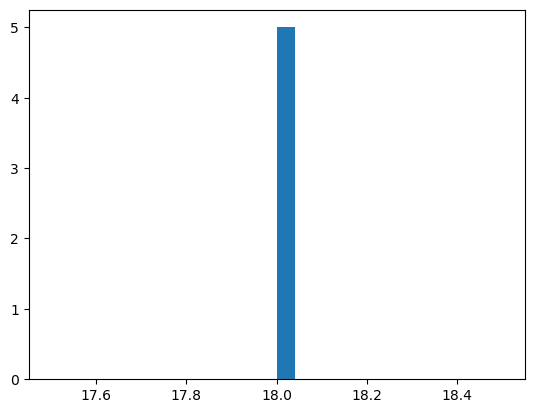

In [8]:
pyplot.hist(dataframe['hour'], bins=24)